# MANGA ANIME EXPRESSION CLASSIFICATION

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

### Getting our Data

In [2]:
directory = '../Manga Expression Classification/Dataset'

In [3]:
Name=[]
for file in os.listdir(directory):
    Name+=[file]
print(Name)
print(len(Name))

['angry', 'crying', 'embarrassed', 'happy', 'pleased', 'sad', 'shock']
7


### Manipulating the Images

In [4]:
N=[]
for i in range(len(Name)):
    N+=[i]
    
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

def mapper(value):
    return reverse_mapping[value]    

In [5]:
dataset=[]
testset=[]
count=0
for file in os.listdir(directory):
    path=os.path.join(directory,file)
    t=0
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(100,100))
        image=img_to_array(image)
        image=image/255.0
        if t<40:
            dataset.append([image,count])
        else:
            testset.append([image,count])
        t+=1
    count=count+1

In [6]:
data,labels0=zip(*dataset)
test,tlabels0=zip(*testset)

In [7]:
labels1=to_categorical(labels0)
data=np.array(data)
labels=np.array(labels1)

In [8]:
tlabels1=to_categorical(tlabels0)
test=np.array(test)
tlabels=np.array(tlabels1)

In [9]:
data2=data.reshape(-1,100,100,3)
test2=test.reshape(-1,100,100,3)

### Splitting for Training and Testing

In [10]:
trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.2,random_state=44)

In [11]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(221, 100, 100, 3)
(56, 100, 100, 3)
(221, 7)
(56, 7)


In [12]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [13]:
pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(100,100,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

In [14]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(7, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [15]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

### Fitting the Model

In [16]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=30)

Epoch 1/30
7/7 [==============================] - 14s 1s/step - loss: 2.3284 - accuracy: 0.1312 - val_loss: 2.4470 - val_accuracy: 0.1071
Epoch 2/30
7/7 [==============================] - 6s 935ms/step - loss: 2.0524 - accuracy: 0.2805 - val_loss: 2.0743 - val_accuracy: 0.1607
Epoch 3/30
7/7 [==============================] - 6s 918ms/step - loss: 1.7764 - accuracy: 0.3167 - val_loss: 2.0558 - val_accuracy: 0.1964
Epoch 4/30
7/7 [==============================] - 6s 915ms/step - loss: 1.6649 - accuracy: 0.4118 - val_loss: 2.0128 - val_accuracy: 0.1786
Epoch 5/30
7/7 [==============================] - 6s 907ms/step - loss: 1.5687 - accuracy: 0.4208 - val_loss: 1.9755 - val_accuracy: 0.2143
Epoch 6/30
7/7 [==============================] - 9s 1s/step - loss: 1.5514 - accuracy: 0.4344 - val_loss: 1.9912 - val_accuracy: 0.2679
Epoch 7/30
7/7 [==============================] - 8s 1s/step - loss: 1.4984 - accuracy: 0.4389 - val_loss: 1.8092 - val_accuracy: 0.3036
Epoch 8/30
7/7 [============

### Making Predictions

In [17]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       0.29      0.67      0.40         6
           1       0.75      0.23      0.35        13
           2       0.25      0.33      0.29         6
           3       0.60      0.38      0.46         8
           4       0.45      0.56      0.50         9
           5       0.14      0.14      0.14         7
           6       0.57      0.57      0.57         7

    accuracy                           0.39        56
   macro avg       0.44      0.41      0.39        56
weighted avg       0.48      0.39      0.39        56



### Checking Accuracy

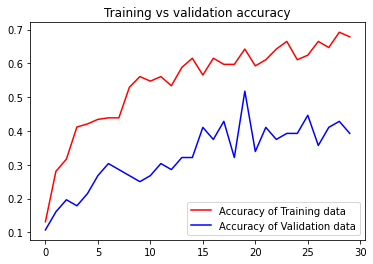

<Figure size 432x288 with 0 Axes>

In [18]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

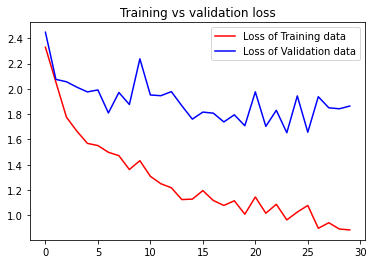

<Figure size 432x288 with 0 Axes>

In [19]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

### Testing the Model with one of the image from the Dataset

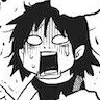

In [20]:
load_img("../Manga Expression Classification/Dataset/shock/011_687_496_112_112.png",target_size=(100,100))

In [21]:
image=load_img("../Manga Expression Classification/Dataset/shock/011_687_496_112_112.png",target_size=(100,100))

image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)

In [22]:
prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print("Prediction is {}.".format(move_name))

Prediction is shock.


In [23]:
# Prediction is correct!!

In [24]:
print(test.shape)
prediction2=model.predict(test)
print(prediction2.shape)

PRED=[]
for item in prediction2:
    value2=np.argmax(item)      
    PRED+=[value2]

(178, 100, 100, 3)
(178, 7)


In [25]:
ANS=tlabels0

In [26]:
accuracy=accuracy_score(ANS,PRED)
print(accuracy)

0.24157303370786518


In [27]:
# Accuracy is not that much. But using different techniques, can definitely be boosted.

### Testing a totally New Image

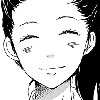

In [28]:
load_img("../Manga Expression Classification/test_img.png",target_size=(100,100))

In [29]:
image=load_img("../Manga Expression Classification/test_img.png",target_size=(100,100))
image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)

prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print("Prediction is {}.".format(move_name))

Prediction is pleased.


In [30]:
# This prediction is correct as well!!